# EDA

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.insert(0, "../src")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import umap
from sklearn import manifold

import config

pd.set_option("display.max_columns", None)

In [7]:
SIZE = 28

## Visualize

In [8]:
df = pd.read_csv(config.TRAIN_CSV)
df.head()

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,1,2,4,2,4,3,1,0,1,2,3,0,3,3,1,3,4,1,3,2,0,4,4,2,3,2,3,0,0,4,0,2,16,73,51,21,1,2,1,4,3,3,2,1,3,3,3,0,2,4,1,0,0,0,0,1,0,0,3,108,176,249,190,128,3,0,3,1,1,4,0,4,3,3,3,3,0,0,4,2,3,1,4,4,3,3,4,133,188,207,107,96,1,1,1,2,4,3,3,1,3,3,1,3,1,3,3,1,1,2,2,4,1,0,1,119,137,133,28,0,4,3,1,3,2,4,1,1,2,3,3,4,2,3,4,4,4,2,1,1,2,4,3,0,31,123,62,5,3,3,2,4,3,2,2,1,3,0,3,1,4,4,3,2,4,4,3,1,3,0,4,5,46,126,66,3,3,3,1,4,0,1,4,4,1,1,3,4,4,1,3,2,0,3,0,3,2,0,4,6,65,127,67,6,0,2,3,1,1,1,4,4,4,4,3,1,2,1,2,0,1,1,3,2,3,0,1,4,66,120,44,3,2,0,1,3,4,4,3,1,2,0,3,0,3,4,3,2,0,0,4,4,3,2,1,22,106,112,22,4,2,2,0,1,1,4,3,3,3,0,2,3,4,3,2,2,3,2,4,2,3,0,3,102,130,114,19,3,0,1,3,1,1,0,1,0,0,2,4,4,3,2,0,0,1,0,2,3,3,1,1,143,200,150,24,4,4,4,4,4,4,2,1,2,0,2,3,3,0,0,1,2,1,0,4,3,2,0,10,128,240,220,66,4,4,2,2,1,3,0,2,2,4,2,2,3,2,1,0,4,4,4,3,1,2,4,6,67,166,217,142,0,3,0,1,2,3,4,2,2,2,1,0,3,0,0,1,2,1,2,0,1,0,3,6,66,1

In [9]:
df_test = pd.read_csv(config.TEST_CSV)
df_test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,4,4,3,1,3,2,2,2,0,1,4,4,4,1,2,4,0,2,1,2,4,1,1,3,1,2,3,0,3,2,4,4,2,33,70,35,4,3,3,3,2,3,0,2,4,0,2,0,2,1,4,2,4,4,0,4,4,2,4,1,44,165,216,84,2,2,3,4,1,0,4,2,2,4,3,4,4,1,0,3,2,3,3,4,2,1,0,19,110,230,247,118,6,2,1,3,1,3,1,2,0,1,3,2,3,1,2,1,4,4,0,2,1,2,0,64,175,252,230,86,6,4,4,2,0,2,1,3,3,0,0,4,4,4,4,0,1,4,4,1,2,0,2,128,193,245,175,69,6,2,0,3,3,0,4,4,2,3,2,2,4,1,0,3,1,0,1,3,4,1,4,146,192,227,144,64,3,4,3,0,1,3,4,2,2,2,2,2,0,0,2,1,1,2,0,2,3,4,1,146,176,174,130,66,6,2,3,2,4,0,1,1,2,2,1,4,1,1,3,4,0,1,0,3,4,4,0,142,131,130,127,67,2,1,1,3,3,1,0,0,2,3,3,3,1,2,4,1,1,2,0,4,0,3,112,106,114,129,118,42,5,3,3,0,0,4,0,4,4,0,2,0,0,3,1,2,4,1,3,2,3,2,55,90,120,127,109,23,3,1,3,4,2,2,2,3,0,1,4,4,1,3,0,2,0,1,3,2,3,4,32,114,129,130,89,15,1,4,2,0,0,3,3,3,0,1,3,0,4,4,0,3,2,1,2,4,1,14,61,126,137,144,101,73,4,1,4,0,2,1,1,0,4,0,3,0,2,3,4,4,4,0,4,2,1,10,81,153,206,222,141,3,4,0,4,0,0,0,3,0,2,3,1,

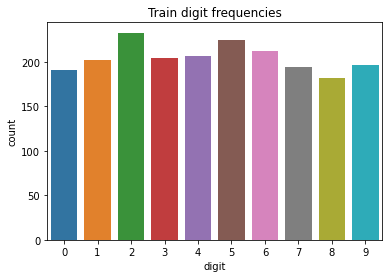

In [10]:
plt.title("Train digit frequencies")
sns.countplot(df.digit);

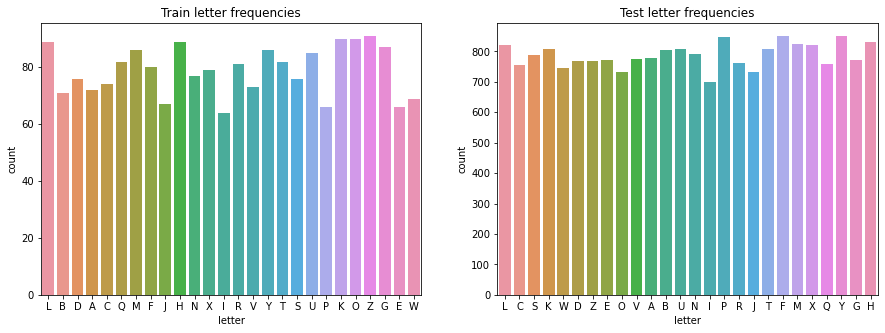

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("Train letter frequencies")
sns.countplot(df.letter, ax=ax[0])
ax[1].set_title("Test letter frequencies")
sns.countplot(df_test.letter, ax=ax[1]);

In [15]:
tab = pd.crosstab(df.digit, df.letter)
pd.crosstab(df.digit, df.letter, margins=True)

letter,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
digit,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5,5,12,6,4,4,11,10,7,3,14,11,6,4,9,6,7,5,7,8,7,4,7,7,10,12,191
1,3,2,15,10,6,13,5,6,5,8,8,7,12,8,11,7,11,10,12,5,6,6,6,8,2,10,202
2,9,8,4,12,9,7,9,16,5,8,11,6,8,18,9,3,13,4,7,5,11,11,11,10,12,7,233
3,1,7,6,15,7,8,7,10,8,15,5,4,11,8,11,9,7,10,9,5,6,6,3,7,10,10,205
4,7,13,5,4,11,8,11,5,5,8,9,11,7,11,7,9,7,7,10,5,11,8,9,5,6,8,207
5,5,4,7,7,8,6,12,12,4,9,7,13,4,5,6,5,10,10,8,9,15,9,9,12,13,16,225
6,8,12,6,7,8,13,12,7,8,5,10,10,8,5,7,6,6,9,6,15,7,5,7,5,11,9,212
7,11,7,6,5,2,7,7,7,10,3,9,10,10,10,10,5,6,14,6,5,2,10,7,7,7,11,194
8,8,7,5,5,3,4,8,8,8,5,8,7,5,6,10,12,7,6,8,12,6,6,5,9,11,3,182


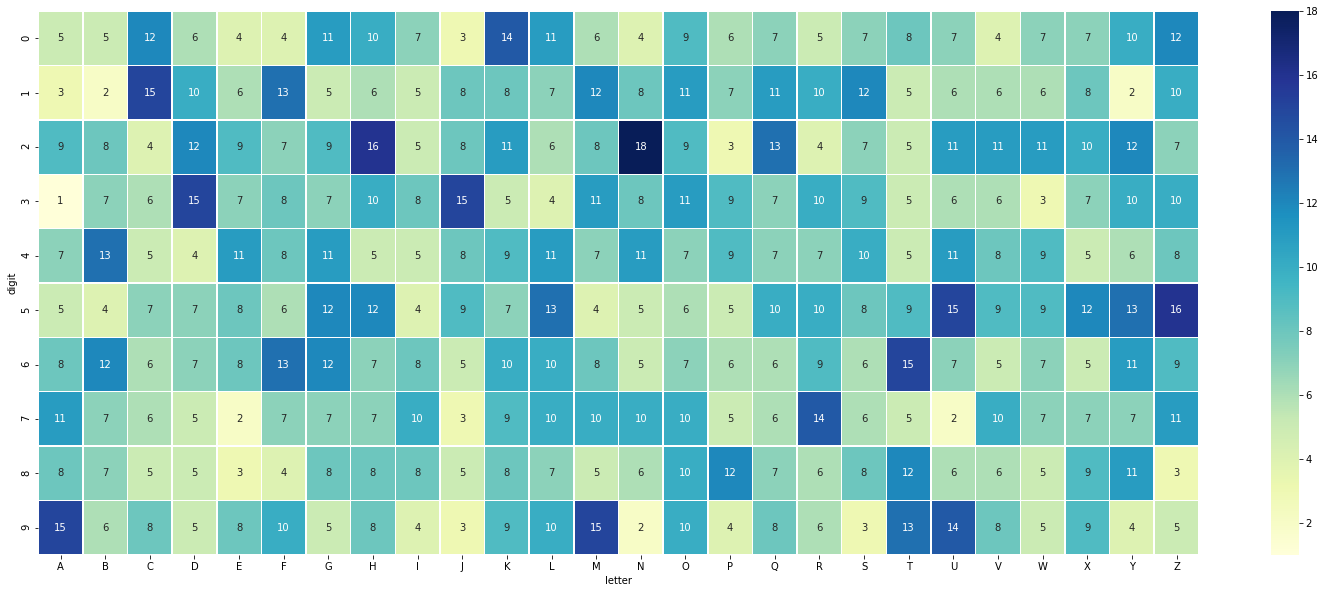

In [16]:
plt.figure(figsize=(26, 10))
sns.heatmap(tab, annot=True, linewidths=0.5, cmap="YlGnBu");

In [17]:
def plot_digits(df, digit):
    tmp = df[df.digit == digit]
    digit_images = tmp[config.PIXEL_COLS].values.reshape(-1, SIZE, SIZE)
    print(digit)
    fig, axes = plt.subplots(3, 10, figsize=(15, 4.5))
    for ax, image in zip(axes.flatten(), digit_images):
        ax.imshow(image, cmap=plt.cm.binary)
        ax.axis("off")
    plt.show()

0


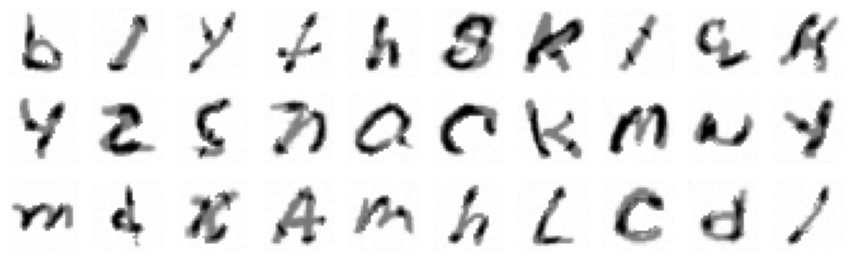

1


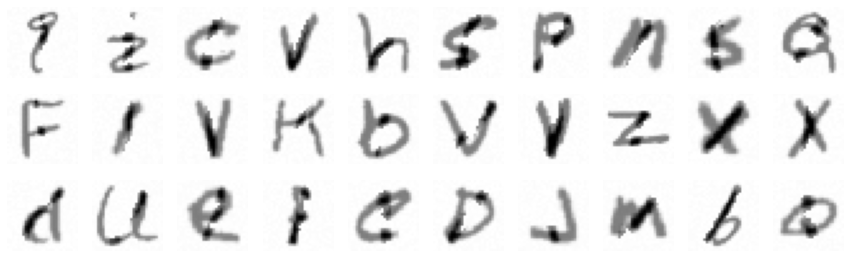

2


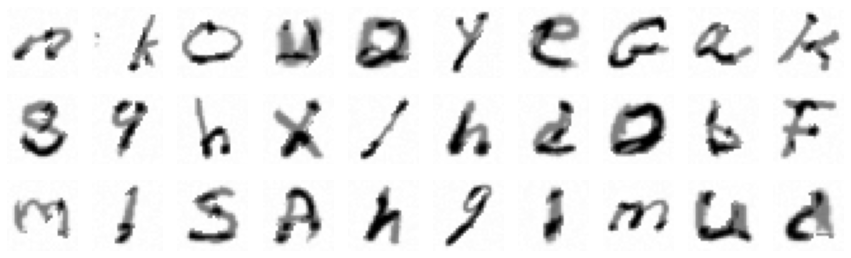

3


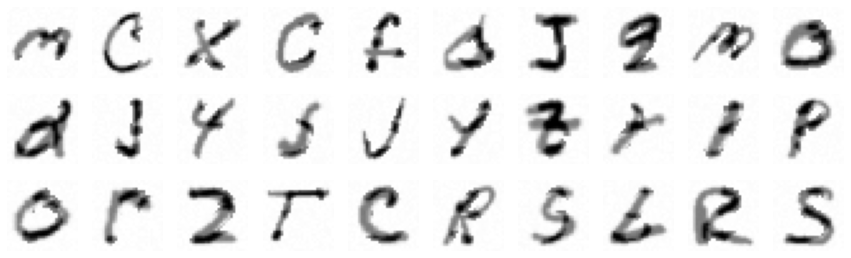

4


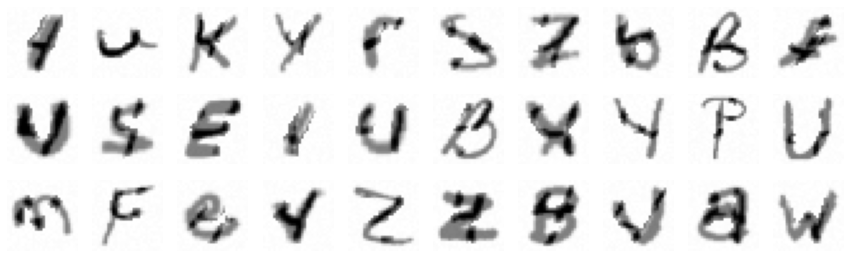

5


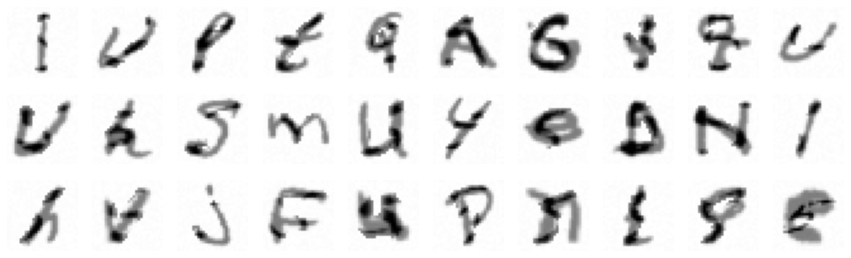

6


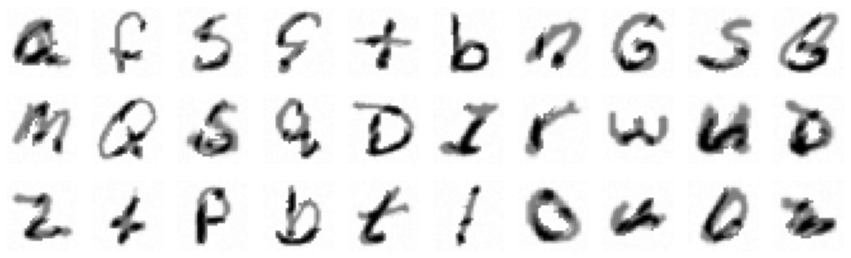

7


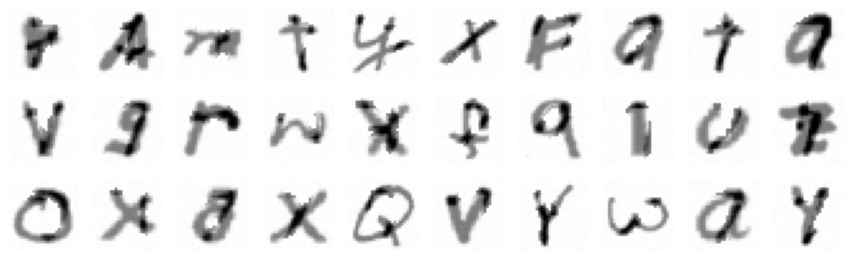

8


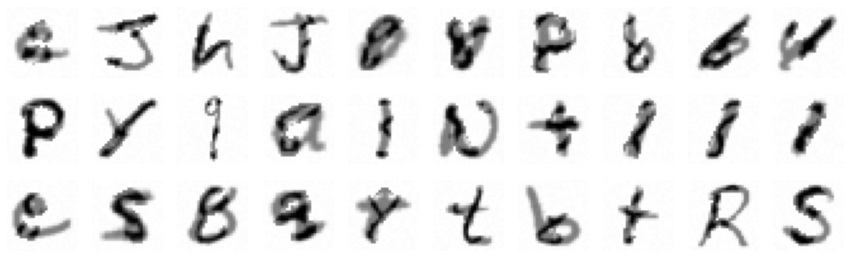

9


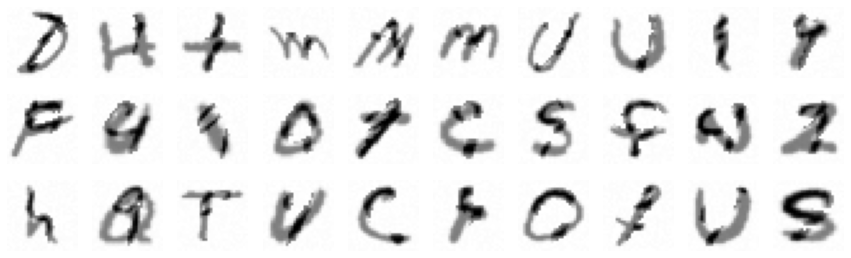

In [18]:
for digit in range(10):
    plot_digits(df, digit)

## Manifold Embeddings

### Digits

In [19]:
images = df[config.PIXEL_COLS].values / 255.0
labels = df.digit.values

In [20]:
tsne = manifold.TSNE(n_jobs=-1)
embedded = tsne.fit_transform(images)

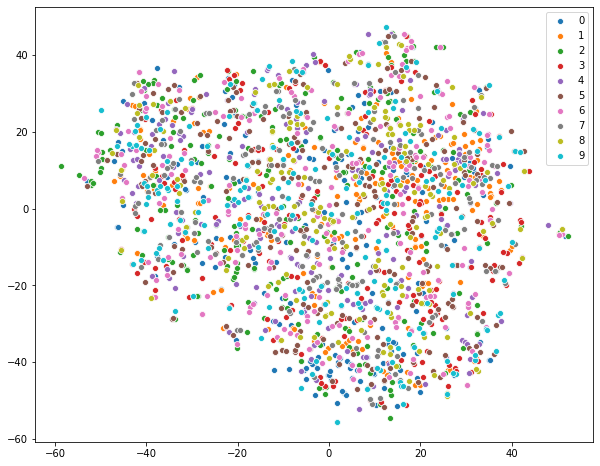

In [21]:
plt.figure(figsize=(10, 8))
for i in range(10):
    xs = embedded[df.digit == i, 0]
    ys = embedded[df.digit == i, 1]
    sns.scatterplot(xs, ys, label=i)
plt.legend();

In [22]:
reducer = umap.UMAP(metric="correlation")
embedded_umap = reducer.fit_transform(images)

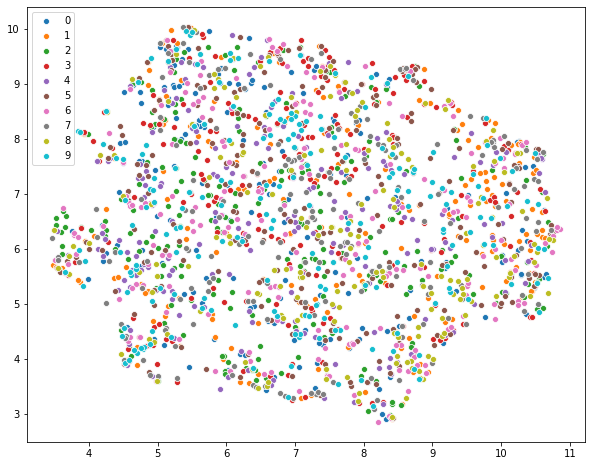

In [23]:
plt.figure(figsize=(10, 8))
for i in range(10):
    xs = embedded_umap[df.digit == i, 0]
    ys = embedded_umap[df.digit == i, 1]
    sns.scatterplot(xs, ys, label=i)
plt.legend();

### Letters

In [25]:
tsne2 = manifold.TSNE(n_jobs=-1)
embedded2 = tsne.fit_transform(images)

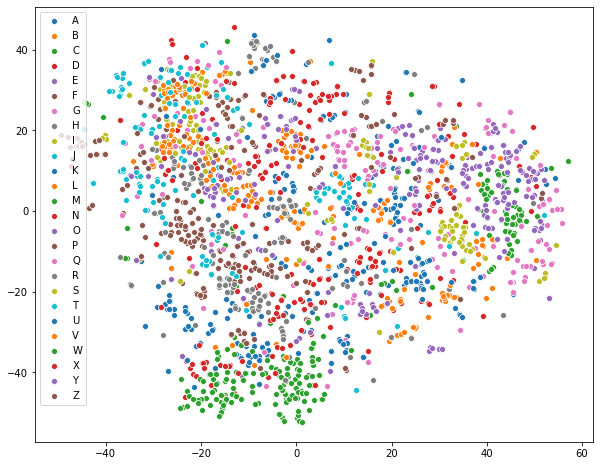

In [26]:
plt.figure(figsize=(10, 8))
for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    xs = embedded2[df.letter == c, 0]
    ys = embedded2[df.letter == c, 1]
    sns.scatterplot(xs, ys, label=c)
plt.legend();

In [27]:
reducer2 = umap.UMAP(metric="correlation")
embed2 = reducer.fit_transform(images)

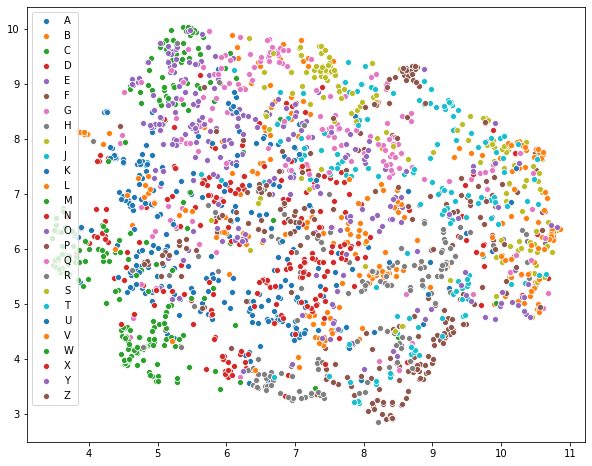

In [28]:
plt.figure(figsize=(10, 8))
for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    xs = embedded_umap[df.letter == c, 0]
    ys = embedded_umap[df.letter == c, 1]
    sns.scatterplot(xs, ys, label=c)
plt.legend();

## Hidden Digits

In [29]:
images = df[config.PIXEL_COLS].values.reshape(-1, SIZE, SIZE)
digits = df.digit.values
letters = df.letter.values

In [30]:
idx = np.random.randint(len(df))
image = images[idx]
digit = digits[idx]
letter = letters[idx]

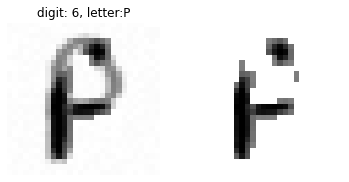

In [46]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image, cmap=plt.cm.binary)
ax[0].set_title(f"digit: {digit}, letter:{letter}")
ax[0].axis("off")
ax[1].imshow(np.where(image >= 127.5, image, 0), cmap=plt.cm.binary)
ax[1].axis("off")
plt.show()

In [ ]:
def plot_hidden_digits(idx):
    image = images[idx]
    letter = letters[idx]
    digit = digits[idx]
    
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(image, cmap=plt.cm.binary)
    ax[0].set_title(f"digit: {digit}, letter:{letter}")
    ax[0].axis("off")
    ax[1].imshow(np.where(image >= 127.5, image, 0), cmap=plt.cm.binary)
    ax[1].axis("off")
    plt.show()